**spring = march, april, may**

**summer = june, july, august**

juneteenth (only in 2021)

july 4th

august has no holidays 

**fall = september, october, november**

**winter = december, january, februrary**

https://www.mikulskibartosz.name/time-in-machine-learning/



In [1]:
import tensorflow 
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from keras import callbacks
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import joblib
from tensorflow import keras
from google.colab import drive
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

drive.mount('/content/drive/', force_remount=True)
pd.options.mode.chained_assignment = None

Mounted at /content/drive/


# JUNE

In [4]:
def printMonth_june():
  pathToData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/Datasets/CAISO_NetDemand_Megawatts_google/' 
  pathToSaveData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/LSTM-Season_REDO/june/' 
  
  dates2019 = [ '20190601', '20190602','20190603','20190604','20190605','20190606','20190607','20190608','20190609','20190610',
              '20190611','20190612','20190613','20190614','20190615','20190616','20190617','20190618','20190619','20190620','20190621',
              '20190622','20190623','20190624','20190625','20190626','20190627','20190628','20190629','20190630']
  dates2020 = ['20200601','20200602','20200603','20200604','20200605','20200606','20200607','20200608','20200609','20200610',
             '20200611','20200612','20200613','20200614','20200615','20200616','20200617','20200618','20200619','20200620','20200621',
             '20200622','20200623','20200624','20200625','20200626','20200627','20200628','20200629','20200630','20200631']
  dates2021 = ['20210601','20210602','20210603','20210604','20210605','20210606','20210607','20210608','20210609','20210610','20210611',
             '20210612','20210613','20210614','20210615','20210616','20210617','20210618','20210619','20210620','20210621','20210622',
             '20210623','20210624','20210625','20210626','20210627','20210628','20210629','20210630']
  june = ['06-01','06-02','06-03','06-04','06-05','06-06','06-07','06-08','06-09','06-10','06-11','06-12','06-13','06-14','06-15','06-16','06-17',
          '06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29','06-30']
  
  xaxis =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
  beg = 'CAISO-netdemand-'
  end = '-Megawatts.csv'
  rms2019_2020 = 0
  rms2019_2021 = 0
  rms2020_2021 = 0
  for i in range(len(dates2019)):
    read2019 = pathToData + beg + dates2019[i] + end
    read2020 = pathToData + beg + dates2020[i] + end
    read2021 = pathToData + beg + dates2021[i] + end
    
    df2019 = pd.read_csv(read2019)
    df2020 = pd.read_csv(read2020)
    df2021 = pd.read_csv(read2021)
    plt.plot(df2019['Megawatts'], color = 'blue', label = '2019')
    plt.plot(df2020['Megawatts'], color = 'red', label = '2020')
    plt.plot(df2021['Megawatts'], color = 'green', label = '2021')
    plt.xticks(xaxis)
    plt.xlabel('Hours')
    plt.ylabel('Megawatts')
    plt.suptitle(june[i])
    plt.legend()
    plt.savefig(pathToSaveData+june[i]+'.jpg', bbox_inches = 'tight', dpi=150)
    plt.show()

    rms2019_2020 += mean_squared_error(df2019['Megawatts'], df2020['Megawatts'], squared=False)
    rms2019_2021 += mean_squared_error(df2019['Megawatts'], df2021['Megawatts'], squared=False)
    rms2020_2021 += mean_squared_error(df2020['Megawatts'], df2021['Megawatts'], squared=False)
    
  avg3 = (rms2019_2020/30 + rms2019_2021/30 + rms2020_2021/30)/3
  print('Average Offset between 2019-2020, 2019-2021, 2020-2021: ', avg3)


In [5]:
# printMonth_june()

In [6]:
def oneMonthRepresentation_june():
  pathToData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/Datasets/CAISO_NetDemand_Megawatts_google/' 
  pathToSaveData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/LSTM-Season_REDO/june/' 

  dates2019 = [ '20190601', '20190602','20190603','20190604','20190605','20190606','20190607','20190608','20190609','20190610',
              '20190611','20190612','20190613','20190614','20190615','20190616','20190617','20190618','20190619','20190620','20190621',
              '20190622','20190623','20190624','20190625','20190626','20190627','20190628','20190629','20190630']
  dates2020 = ['20200601','20200602','20200603','20200604','20200605','20200606','20200607','20200608','20200609','20200610',
              '20200611','20200612','20200613','20200614','20200615','20200616','20200617','20200618','20200619','20200620','20200621',
              '20200622','20200623','20200624','20200625','20200626','20200627','20200628','20200629','20200630','20200631']
  dates2021 = ['20210601','20210602','20210603','20210604','20210605','20210606','20210607','20210608','20210609','20210610','20210611',
              '20210612','20210613','20210614','20210615','20210616','20210617','20210618','20210619','20210620','20210621','20210622',
              '20210623','20210624','20210625','20210626','20210627','20210628','20210629','20210630']
  june = ['06-01','06-02','06-03','06-04','06-05','06-06','06-07','06-08','06-09','06-10','06-11','06-12','06-13','06-14','06-15','06-16','06-17',
          '06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29','06-30']

  xaxis =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
  beg = 'CAISO-netdemand-'
  end = '-Megawatts.csv'
  result2019 = pd.DataFrame()
  result2020 = pd.DataFrame()
  result2021 = pd.DataFrame()
  for i in range(len(dates2019)):
    #2019
    read2019 = pathToData + beg + dates2019[i] + end
    df2019 = pd.read_csv(read2019)
    df2019.drop('date', axis=1, inplace=True)
    result2019 = pd.concat([result2019, df2019], axis=1)
    result2019.iloc[:1, :]
    result2019['mean'] = result2019.mean(axis=1)

    #2020
    read2020 = pathToData + beg + dates2020[i] + end
    df2020 = pd.read_csv(read2020)
    df2020.drop('date', axis=1, inplace=True)
    result2020 = pd.concat([result2020, df2020], axis=1)
    result2020.iloc[:1, :]
    result2020['mean'] = result2020.mean(axis=1)
    #2021
    read2021 = pathToData + beg + dates2021[i] + end
    df2021 = pd.read_csv(read2021)
    df2021.drop('date', axis=1, inplace=True)
    result2021 = pd.concat([result2021, df2021], axis=1)
    result2021.iloc[:1, :]
    result2021['mean'] = result2021.mean(axis=1)

  # round(mean_squared_error(julyRep, augustRep, squared=False),2)
  rms2019_2020 = round(mean_squared_error(result2019['mean'], result2020['mean'], squared=False), 2)
  rms2019_2021 = round(mean_squared_error(result2019['mean'], result2021['mean'], squared=False), 2)
  rms2020_2021 = round(mean_squared_error(result2020['mean'], result2021['mean'], squared=False), 2)
  avg3 = (rms2019_2020 + rms2019_2021 + rms2020_2021)/3
  print('Average RMSE between 2019-2020, 2019-2021, 2020-2021: ', avg3)

  plt.plot(result2019['mean'], color = 'blue', label = '2019')
  plt.plot(result2020['mean'], color = 'red', label = '2020')
  plt.plot(result2021['mean'], color = 'green', label = '2021')

  plt.xticks(xaxis)
  plt.xlabel('Hours')
  plt.ylabel('Megawatts')
  plt.suptitle('June', weight = 'bold')
  plt.title('Offsets: 2019-2020(' +str(rms2019_2020)+') 2019-2021(' + str(rms2019_2021)+') 2020-2021('+str(rms2020_2021)+')')
  plt.legend()
  plt.savefig(pathToSaveData+ 'juneAvg.jpg', bbox_inches = 'tight', dpi=150)
  plt.show()

  averageJune= pd.concat([result2019['mean'], result2020['mean'], result2021['mean']], axis=1)
  finalRep = averageJune.mean(axis=1)
  return finalRep


Average RMSE between 2019-2020, 2019-2021, 2020-2021:  1244.41


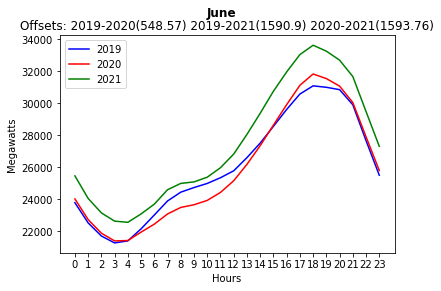

In [7]:
juneRep = oneMonthRepresentation_june()

#JULY 

In [ ]:
for i in range(1, 32):
  # print('\'202107'+ str(i)+'\',', end="")
  print('\'07-'+ str(i)+'\',', end="")

'07-1','07-2','07-3','07-4','07-5','07-6','07-7','07-8','07-9','07-10','07-11','07-12','07-13','07-14','07-15','07-16','07-17','07-18','07-19','07-20','07-21','07-22','07-23','07-24','07-25','07-26','07-27','07-28','07-29','07-30','07-31',

In [8]:
def printMonth_july():
  pathToData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/Datasets/CAISO_NetDemand_Megawatts_google/' 
  pathToSaveData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/LSTM-Season_REDO/july/' 
  
  dates2019 = ['20190701','20190702','20190703','20190704','20190705','20190706','20190707','20190708','20190709','20190710',
               '20190711','20190712','20190713','20190714','20190715','20190716','20190717','20190718','20190719',
               '20190720','20190721','20190722','20190723','20190724','20190725','20190726','20190727','20190728','20190729','20190730','20190731']
  dates2020 = ['20200701','20200702','20200703','20200704','20200705','20200706','20200707','20200708','20200709','20200710',
               '20200711','20200712','20200713','20200714','20200715','20200716','20200717','20200718','20200719','20200720',
               '20200721','20200722','20200723','20200724','20200725','20200726','20200727','20200728','20200729','20200730','20200731']
  dates2021 = ['20210701','20210702','20210703','20210704','20210705','20210706','20210707','20210708','20210709','20210710','20210711',
               '20210712','20210713','20210714','20210715','20210716','20210717','20210718','20210719','20210720','20210721','20210722',
               '20210723','20210724','20210725','20210726','20210727','20210728','20210729','20210730','20210731']
  july = ['07-01','07-02','07-03','07-04','07-05','07-06','07-07','07-08','07-09','07-10','07-11','07-12','07-13','07-14','07-15',
          '07-16','07-17','07-18','07-19','07-20','07-21','07-22','07-23','07-24','07-25','07-26','07-27','07-28','07-29','07-30','07-31']
  
  xaxis =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
  beg = 'CAISO-netdemand-'
  end = '-Megawatts.csv'

  for i in range(len(dates2019)):
    read2019 = pathToData + beg + dates2019[i] + end
    read2020 = pathToData + beg + dates2020[i] + end
    read2021 = pathToData + beg + dates2021[i] + end
    
    df2019 = pd.read_csv(read2019)
    df2020 = pd.read_csv(read2020)
    df2021 = pd.read_csv(read2021)
    plt.plot(df2019['Megawatts'], color = 'blue', label = '2019')
    plt.plot(df2020['Megawatts'], color = 'red', label = '2020')
    plt.plot(df2021['Megawatts'], color = 'green', label = '2021')
    plt.xticks(xaxis)
    plt.xlabel('Hours')
    plt.ylabel('Megawatts')
    plt.suptitle(july[i])
    plt.legend()
    plt.savefig(pathToSaveData+july[i]+'.jpg', bbox_inches = 'tight', dpi=150)
    plt.show()

    rms2019_2020 = mean_squared_error(df2019['Megawatts'], df2020['Megawatts'], squared=False)
    rms2019_2021 = mean_squared_error(df2019['Megawatts'], df2021['Megawatts'], squared=False)
    rms2020_2021 = mean_squared_error(df2020['Megawatts'], df2021['Megawatts'], squared=False)
    avg3 = (rms2019_2020 + rms2019_2021 + rms2020_2021)/3
    print('Average RMSE between 2019-2020, 2019-2021, 2020-2021: ', avg3)


In [ ]:
# printMonth_july()

In [9]:

def oneMonthRepresentation_july():
  pathToData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/Datasets/CAISO_NetDemand_Megawatts_google/' 
  pathToSaveData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/LSTM-Season_REDO/july/' 

  dates2019 = ['20190701','20190702','20190703','20190704','20190705','20190706','20190707','20190708','20190709','20190710',
               '20190711','20190712','20190713','20190714','20190715','20190716','20190717','20190718','20190719',
               '20190720','20190721','20190722','20190723','20190724','20190725','20190726','20190727','20190728','20190729','20190730','20190731']
  dates2020 = ['20200701','20200702','20200703','20200704','20200705','20200706','20200707','20200708','20200709','20200710',
               '20200711','20200712','20200713','20200714','20200715','20200716','20200717','20200718','20200719','20200720',
               '20200721','20200722','20200723','20200724','20200725','20200726','20200727','20200728','20200729','20200730','20200731']
  dates2021 = ['20210701','20210702','20210703','20210704','20210705','20210706','20210707','20210708','20210709','20210710','20210711',
               '20210712','20210713','20210714','20210715','20210716','20210717','20210718','20210719','20210720','20210721','20210722',
               '20210723','20210724','20210725','20210726','20210727','20210728','20210729','20210730','20210731']
  july = ['07-01','07-02','07-03','07-04','07-05','07-06','07-07','07-08','07-09','07-10','07-11','07-12','07-13','07-14','07-15',
          '07-16','07-17','07-18','07-19','07-20','07-21','07-22','07-23','07-24','07-25','07-26','07-27','07-28','07-29','07-30','07-31']
  
  xaxis =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
  beg = 'CAISO-netdemand-'
  end = '-Megawatts.csv'
  result2019 = pd.DataFrame()
  result2020 = pd.DataFrame()
  result2021 = pd.DataFrame()
  for i in range(len(dates2019)):
    #2019
    read2019 = pathToData + beg + dates2019[i] + end
    df2019 = pd.read_csv(read2019)
    df2019.drop('date', axis=1, inplace=True)
    result2019 = pd.concat([result2019, df2019], axis=1)
    result2019.iloc[:1, :]
    result2019['mean'] = result2019.mean(axis=1)

    #2020
    read2020 = pathToData + beg + dates2020[i] + end
    df2020 = pd.read_csv(read2020)
    df2020.drop('date', axis=1, inplace=True)
    result2020 = pd.concat([result2020, df2020], axis=1)
    result2020.iloc[:1, :]
    result2020['mean'] = result2020.mean(axis=1)
    #2021
    read2021 = pathToData + beg + dates2021[i] + end
    df2021 = pd.read_csv(read2021)
    df2021.drop('date', axis=1, inplace=True)
    result2021 = pd.concat([result2021, df2021], axis=1)
    result2021.iloc[:1, :]
    result2021['mean'] = result2021.mean(axis=1)

  rms2019_2020 = round(mean_squared_error(result2019['mean'], result2020['mean'], squared=False), 2)
  rms2019_2021 = round(mean_squared_error(result2019['mean'], result2021['mean'], squared=False), 2)
  rms2020_2021 = round(mean_squared_error(result2020['mean'], result2021['mean'], squared=False), 2)
  avg3 = (rms2019_2020 + rms2019_2021 + rms2020_2021)/3
  print('Average RMSE between 2019-2020, 2019-2021, 2020-2021: ', avg3)

  plt.plot(result2019['mean'], color = 'blue', label = '2019')
  plt.plot(result2020['mean'], color = 'red', label = '2020')
  plt.plot(result2021['mean'], color = 'green', label = '2021')

  plt.xticks(xaxis)
  plt.xlabel('Hours')
  plt.ylabel('Megawatts')
  plt.suptitle('July', weight = 'bold')
  plt.title('Offsets: 2019-2020(' +str(rms2019_2020)+') 2019-2021(' + str(rms2019_2021)+') 2020-2021('+str(rms2020_2021)+')')
  plt.legend()
  plt.savefig(pathToSaveData+ 'julyAvg.jpg', bbox_inches = 'tight', dpi=150)
  plt.show()

  averageJuly= pd.concat([result2019['mean'], result2020['mean'], result2021['mean']], axis=1)
  finalRep = averageJuly.mean(axis=1)
  return finalRep

Average RMSE between 2019-2020, 2019-2021, 2020-2021:  1496.4666666666665


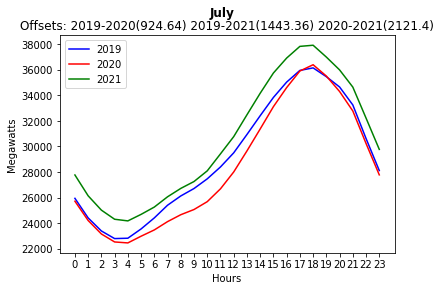

In [10]:
julyRep = oneMonthRepresentation_july()

# AUGUST

In [ ]:
for i in range(1, 32):
  # print('\'202108'+ str(i)+'\',', end="")
  print('\'08-'+ str(i)+'\',', end="")

'08-1','08-2','08-3','08-4','08-5','08-6','08-7','08-8','08-9','08-10','08-11','08-12','08-13','08-14','08-15','08-16','08-17','08-18','08-19','08-20','08-21','08-22','08-23','08-24','08-25','08-26','08-27','08-28','08-29','08-30','08-31',

In [11]:
def printMonth_august():
  pathToData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/Datasets/CAISO_NetDemand_Megawatts_google/' 
  pathToSaveData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/LSTM-Season_REDO/august/' 

  dates2019 = ['20190801','20190802','20190803','20190804','20190805','20190806','20190807','20190808','20190809','20190810','20190811','20190812',
               '20190813','20190814','20190815','20190816','20190817','20190818','20190819','20190820','20190821','20190822','20190823',
               '20190824','20190825','20190826','20190827','20190828','20190829','20190830','20190831']
  dates2020 = ['20200801','20200802','20200803','20200804','20200805','20200806','20200807','20200808','20200809','20200810','20200811','20200812',
               '20200813','20200814','20200815','20200816','20200817','20200818','20200819','20200820','20200821','20200822','20200823',
               '20200824','20200825','20200826','20200827','20200828','20200829','20200830','20200831']
  dates2021 = ['20210801','20210802','20210803','20210804','20210805','20210806','20210807','20210808','20210809','20210810','20210811','20210812',
               '20210813','20210814','20210815','20210816','20210817','20210818','20210819','20210820','20210821','20210822','20210823','20210824',
               '20210825','20210826','20210827','20210828','20210829','20210830','20210831']
  august = ['08-01','08-02','08-03','08-04','08-05','08-06','08-07','08-08','08-09','08-10','08-11','08-12','08-13','08-14','08-15','08-16',
          '08-17','08-18','08-19','08-20','08-21','08-22','08-23','08-24','08-25','08-26','08-27','08-28','08-29','08-30','08-31']
  
  xaxis =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
  beg = 'CAISO-netdemand-'
  end = '-Megawatts.csv'

  for i in range(len(dates2019)):
    read2019 = pathToData + beg + dates2019[i] + end
    read2020 = pathToData + beg + dates2020[i] + end
    read2021 = pathToData + beg + dates2021[i] + end
    
    df2019 = pd.read_csv(read2019)
    df2020 = pd.read_csv(read2020)
    df2021 = pd.read_csv(read2021)

    plt.plot(df2019['Megawatts'], color = 'blue', label = '2019')
    plt.plot(df2020['Megawatts'], color = 'red', label = '2020')
    plt.plot(df2021['Megawatts'], color = 'green', label = '2021')
    plt.xticks(xaxis)
    plt.xlabel('Hours')
    plt.ylabel('Megawatts')
    plt.suptitle(august[i])
    plt.legend()
    plt.savefig(pathToSaveData+august[i]+'.jpg', bbox_inches = 'tight', dpi=150)
    plt.show()
    rms2019_2020 = mean_squared_error(df2019['Megawatts'], df2020['Megawatts'], squared=False)
    rms2019_2021 = mean_squared_error(df2019['Megawatts'], df2021['Megawatts'], squared=False)
    rms2020_2021 = mean_squared_error(df2020['Megawatts'], df2021['Megawatts'], squared=False)
    avg3 = (rms2019_2020 + rms2019_2021 + rms2020_2021)/3
    print('Average RMSE between 2019-2020, 2019-2021, 2020-2021: ', avg3)


In [12]:
# printMonth_august()

In [13]:
def oneMonthRepresentation_august():
  pathToData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/Datasets/CAISO_NetDemand_Megawatts_google/' 
  pathToSaveData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/LSTM-Season_REDO/august/' 
  dates2019 = ['20190801','20190802','20190803','20190804','20190805','20190806','20190807','20190808','20190809','20190810','20190811','20190812',
               '20190813','20190814','20190815','20190816','20190817','20190818','20190819','20190820','20190821','20190822','20190823',
               '20190824','20190825','20190826','20190827','20190828','20190829','20190830','20190831']
  dates2020 = ['20200801','20200802','20200803','20200804','20200805','20200806','20200807','20200808','20200809','20200810','20200811','20200812',
               '20200813','20200814','20200815','20200816','20200817','20200818','20200819','20200820','20200821','20200822','20200823',
               '20200824','20200825','20200826','20200827','20200828','20200829','20200830','20200831']
  dates2021 = ['20210801','20210802','20210803','20210804','20210805','20210806','20210807','20210808','20210809','20210810','20210811','20210812',
               '20210813','20210814','20210815','20210816','20210817','20210818','20210819','20210820','20210821','20210822','20210823','20210824',
               '20210825','20210826','20210827','20210828','20210829','20210830','20210831']
  august = ['08-01','08-02','08-03','08-04','08-05','08-06','08-07','08-08','08-09','08-10','08-11','08-12','08-13','08-14','08-15','08-16',
          '08-17','08-18','08-19','08-20','08-21','08-22','08-23','08-24','08-25','08-26','08-27','08-28','08-29','08-30','08-31']
  
  xaxis =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
  beg = 'CAISO-netdemand-'
  end = '-Megawatts.csv'
  result2019 = pd.DataFrame()
  result2020 = pd.DataFrame()
  result2021 = pd.DataFrame()
  for i in range(len(dates2019)):
    #2019
    read2019 = pathToData + beg + dates2019[i] + end
    df2019 = pd.read_csv(read2019)
    df2019.drop('date', axis=1, inplace=True)
    result2019 = pd.concat([result2019, df2019], axis=1)
    result2019.iloc[:1, :]
    result2019['mean'] = result2019.mean(axis=1)

    #2020
    read2020 = pathToData + beg + dates2020[i] + end
    df2020 = pd.read_csv(read2020)
    df2020.drop('date', axis=1, inplace=True)
    result2020 = pd.concat([result2020, df2020], axis=1)
    result2020.iloc[:1, :]
    result2020['mean'] = result2020.mean(axis=1)
    #2021
    read2021 = pathToData + beg + dates2021[i] + end
    df2021 = pd.read_csv(read2021)
    df2021.drop('date', axis=1, inplace=True)
    result2021 = pd.concat([result2021, df2021], axis=1)
    result2021.iloc[:1, :]
    result2021['mean'] = result2021.mean(axis=1)

  rms2019_2020 = round(mean_squared_error(result2019['mean'], result2020['mean'], squared=False), 2)
  rms2019_2021 = round(mean_squared_error(result2019['mean'], result2021['mean'], squared=False), 2)
  rms2020_2021 = round(mean_squared_error(result2020['mean'], result2021['mean'], squared=False), 2)
  avg3 = (rms2019_2020 + rms2019_2021 + rms2020_2021)/3
  print('Average RMSE between 2019-2020, 2019-2021, 2020-2021: ', avg3)

  plt.plot(result2019['mean'], color = 'blue', label = '2019')
  plt.plot(result2020['mean'], color = 'red', label = '2020')
  plt.plot(result2021['mean'], color = 'green', label = '2021')

  plt.xticks(xaxis)
  plt.xlabel('Hours')
  plt.ylabel('Megawatts')
  plt.suptitle('August', weight = 'bold')
  plt.title('Offsets: 2019-2020(' +str(rms2019_2020)+') 2019-2021(' + str(rms2019_2021)+') 2020-2021('+str(rms2020_2021) +')')
  plt.legend()
  plt.savefig(pathToSaveData+ 'augustAvg.jpg', bbox_inches = 'tight', dpi=150)
  plt.show()

  averageAug = pd.concat([result2019['mean'], result2020['mean'], result2021['mean']], axis=1)
  finalRep = averageAug.mean(axis=1)
  return finalRep

Average RMSE between 2019-2020, 2019-2021, 2020-2021:  1080.2633333333333


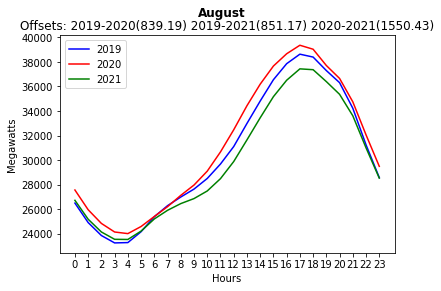

In [14]:
augustRep = oneMonthRepresentation_august()

# ONE SEASON

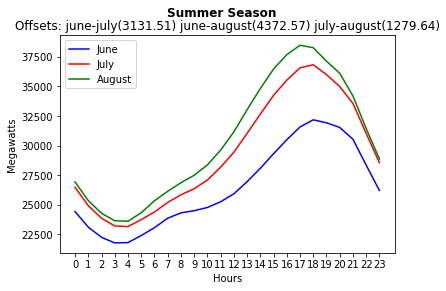

In [16]:
pathToSaveData = '/content/drive/MyDrive/Fairness ML/FairnessML_git/LSTM-Season_REDO/summerSeason/' 

plt.plot(juneRep, color = 'blue', label = 'June')
plt.plot(julyRep, color = 'red', label = 'July')
plt.plot(augustRep, color = 'green', label = 'August')

xaxis =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
june_july = round(mean_squared_error(juneRep, julyRep, squared=False), 2)
june_august = round(mean_squared_error(juneRep, augustRep, squared=False), 2)
july_august = round(mean_squared_error(julyRep, augustRep, squared=False),2)
plt.xticks(xaxis)
plt.xlabel('Hours')
plt.ylabel('Megawatts')
plt.suptitle('Summer Season', weight='bold')
plt.title('Offsets: june-july('+str(june_july) +') june-august(' + str(june_august) + ') july-august(' + str(july_august)+')')
plt.legend()
plt.savefig(pathToSaveData+ 'Avg.jpg', bbox_inches = 'tight', dpi=150)
plt.show()